# Reconstruction

In this notebook, I will be conducting an architectural reconstruction on the <mark>[Zeeguu/API](https://github.com/zeeguu/api) project</mark>. This means that I will gather as much information as possible from the implicit architecture (as-implemented architecture), using a variety of different tools to gain perspective into different architectural views: code, module, evolutionary, and execution view.

I will concentrate on recovering the <mark>architectural module view</mark>. As I lack extensive experience in reengineering, I've chosen a simpler view.

<div class="alert alert-block alert-info">
    My primary objective is to recover the architectural module view, and gain a comprehensive understanding of the entire system.
</div>

## Architectural Lens

The first tool I will use is called Architectural Lens. It is a software tool that generates a package view to display packages and their corresponding dependencies.

Be aware that the GitHub readme documentation is not completely up to date.

Link: [Architectural-Lens/tree/master](https://github.com/Perlten/Architectural-Lens/tree/master)

In [1]:
!pip3 install Architectural-Lens # install the package

In [2]:
import os

# Locate the current directory
current_folder = os.path.basename(os.getcwd())
print("Current folder:", current_folder)

Current folder: reconstruction


In [3]:
# Change the directory to the root of the 'zeeguu_project'
ROOT_FOLDER = 'api'

if current_folder != ROOT_FOLDER:
    os.chdir(ROOT_FOLDER)
    print("Current folder:", os.path.basename(os.getcwd()))

Current folder: api


In [4]:
# Run the Architectural Lens
!archlens init

In [5]:
# Check to see if the 'archlens.json' file is created
if os.path.exists('archlens.json'):
    print("'SUCCESS: archlens.json' file exists; the contents of the file are:")
    # Content of the 'archlens.json' file
    with open('archlens.json', 'r') as file:
        content = file.read()
        print(content)
else:
    print("'archlens.json' file does not exist.")

'SUCCESS: archlens.json' file exists; the contents of the file are:
{
    "$schema": "https://raw.githubusercontent.com/Perlten/Architectural-Lens/master/config.schema.json",
    "name": "api",
    "rootFolder": "",
    "github": {
        "url": "",
        "branch": "main"
    },
    "saveLocation": "./diagrams/",
    "views": {
        "completeView": {
            "packages": [
                {
                    "packagePath": "",
                    "depth": 0
                }
            ],
            "ignorePackages": []
        }
    }
}


<div class="alert alert-block alert-info">
    Now, I have to manually locate the `archlens.json` folder. This process involves specifying the rootFolder, naming the view I'm interested in extracting, and indicating the packages I'm not interested in, among other things.
</div>

First, I begin by viewing the entire system.

In [6]:
# Render the architectural package diagram
# !pip3 uninstall plantuml
# !archlens render              # COMMENTED OUT
"""
Error:
File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plantuml.py", line 171, in processes
    raise PlantUMLConnectionError(e)
PlantUMLConnectionError: Unable to find the server at mt-plantuml-app-service.azurewebsites.net
""";

<div class="alert alert-block alert-warning">  
    Given that I encountered a <mark>PlantUMLConnectionError</mark> and was unable to resolve it, I used the following `archlens.json` config file. Instead, I had a fellow student run the `archlens render` command for me.
</div>

<div class="alert alert-block alert-info">
    I used the following json code.
</div>

```json
{
    "$schema": "https://raw.githubusercontent.com/Perlten/Architectural-Lens/master/config.schema.json",
    "name": "-",
    "rootFolder": "zeeguu",
    "github": {
        "url": "https://github.com/zeeguu/api",
        "branch": "master"
    },
    "saveLocation": "./diagramsSimon/",
    "views": {
        "completeView": {
            "packages": [],
            "ignorePackages": []
        },
        "coreView": {
            "packages": ["core"],
            "ignorePackages": []
        },
        "coreModelView": {
            "packages": ["core.model"],
            "ignorePackages": []
        },
        "apiView": {
            "packages": ["api"],
            "ignorePackages": []
        },
        "apiDepthView": {
            "packages": [
                {
                    "path": "api",
                    "depth": 3
                }
            ],
            "ignorePackages": []
        }
    }
}
```

<div class="alert alert-block alert-success">
    Given that the tool did not output the diagrams I attempted to configure, I still managed to obtain three different views: complete, core, and API view, all at depth 2. They are all shown below:
</div>

**Complete, top-level-view, of source code**
<img src="../img/archlens/completeView.png"
     alt="api"
     style="float: center; margin-right: 10px; margin-bottom: 10px" />


**View of API module**   
<img src="../img/archlens/apiDepth.png"
     alt="api"
     style="float: center; margin-right: 10px; margin-bottom: 10px" />

     
**View of Core module**
<img src="../img/archlens/coreView.png"
     alt="api"
     style="float: left; margin-right: 10px; margin-bottom: 10px" />


## Pyreverse

The second tool I will use is the Pyreverse tool, which is part of the pylint package, a static code analyzer.

Link: [Pyreverse](https://pypi.org/project/pyreverse/)

In [7]:
!pip3 install pylint

In [8]:
# The outcommented code below was used to different class and package diagrams
# !pyreverse -o png zeeguu
# !pyreverse -o png zeeguu/core
# !pyreverse -o png zeeguu/core/model
# !pyreverse -o png zeeguu/api
# !pyreverse -o png zeeguu/api/endpoints
!pyreverse -o png zeeguu/core/language

Format png is not supported natively. Pyreverse will try to generate it using Graphviz...
parsing zeeguu/core/language/__init__.py...
parsing /Users/simonskodt/Library/Mobile Documents/com~apple~CloudDocs/8_semester/SOARC_Software-Architecture/Individual-project/architectural-reconstruction/reconstruction/api/zeeguu/core/language/__init__.py...
parsing /Users/simonskodt/Library/Mobile Documents/com~apple~CloudDocs/8_semester/SOARC_Software-Architecture/Individual-project/architectural-reconstruction/reconstruction/api/zeeguu/core/language/difficulty_estimator_factory.py...
parsing /Users/simonskodt/Library/Mobile Documents/com~apple~CloudDocs/8_semester/SOARC_Software-Architecture/Individual-project/architectural-reconstruction/reconstruction/api/zeeguu/core/language/difficulty_estimator_strategy.py...
parsing /Users/simonskodt/Library/Mobile Documents/com~apple~CloudDocs/8_semester/SOARC_Software-Architecture/Individual-project/architectural-reconstruction/reconstruction/api/zeeguu/co

<div class="alert alert-block alert-success">
    Some of the interestingly generated diagrams are inserted below:
</div>

**API package diagram**
<img src="../img/pyreverse/api-packages.png"
     alt="api"
     style="float: center; margin-right: 10px; margin-bottom: 10px" />

**<code>core/model/estimator</code> class diagram**   
<img src="../img/pyreverse/core-estimator-classes.png"
     alt="api"
     style="float: center; margin-right: 10px; margin-bottom: 10px" />

## Git Truck

The third tool I will use is the Git-Truck tool, which looks at files that are most often changed and who has contributed to which files.

Link: [git-truck/tree/main](https://github.com/git-truck/git-truck)

In [9]:
# !npx -y git-truck

<div class="alert alert-block alert-success">
    From Git-Truck, I was able to obtain information about which files were committed to most, which files were changed recently, and which files have not been changed in a while. I also found out which files only have a single contributor, and who in general is the biggest contributor.
</div>

**Number of commits**; *the <span style="color:red;">redder</span> it is, the greater the number of commits*
<img src="../img/gittruck/commits.png"
     alt="api"
     style="float: center; margin-right: 10px; margin-bottom: 10px" />

**Time since file was changed**; *if it is <span style="color:lightblue;">light blue</span>, then it has been recently changed and vise versa*
<img src="../img/gittruck/last-changed.png"
     alt="api"
     style="float: center; margin-right: 10px; margin-bottom: 10px" />

**Files with a single author**; *if <span style="color:cyan;">in</span> <span style="color:lightblue;">any</span> <span style="color:purple;">color</span>*, then there has only been a single author contributing to that file
<img src="../img/gittruck/single-author.png"
     alt="api"
     style="float: center; margin-right: 10px; margin-bottom: 10px" />

**Top contributor per file**; *a <span style="color:lightblue;">distinct</span> color for each contributor*
<img src="../img/gittruck/top-contributer.png"
     alt="api"
     style="float: center; margin-right: 10px; margin-bottom: 10px" />

## Static Code Analysis

To gain a better understanding of the system, I will conduct a static analysis to reveal dependencies, vulnerabilities, and potential bugs.

### Prospector

It turns out that Prospector can encapsulate many of the static analysis tools for Python, such as Pylint, Pyflakes, Mccabe, etc.

Link: [prospector.landscape.io](https://prospector.landscape.io/en/master/)

In [10]:
!pip3 install prospector
!pip3 install setuptools

In [11]:
ZEEGUU_FOLDER = 'zeeguu'
current_folder = os.path.basename(os.getcwd())

if current_folder != ZEEGUU_FOLDER:
    os.chdir(ZEEGUU_FOLDER)
    
print("Current folder:", current_folder)

Current folder: api


<div class="alert alert-block alert-info">
    I will run a subprocess to execute Prospector in my desired location.
</div>

In [12]:
import subprocess

# To run prospector, we simple run the command below
# Here, we save the output to a file
PROSP_REPORT = '../../source_analysis_files/prospector_report.txt'

if not os.path.exists(PROSP_REPORT):
    # Run prospector command and redirect output to prosp file
    with open(PROSP_REPORT, 'w') as f:
        subprocess.run(['prospector'], stdout=f)
    print("Report created.")

print("Report already exists.")

Report already exists.


**Stats of generated report:**

```txt
Check Information
=================
         Started: 2024-05-07 13:43:46.100857
        Finished: 2024-05-07 13:44:00.805725
      Time Taken: 14.70 seconds
       Formatter: grouped
        Profiles: default, no_doc_warnings, no_test_warnings, strictness_medium, strictness_high, strictness_veryhigh, no_member_warnings
      Strictness: None
  Libraries Used: flask
       Tools Run: dodgy, mccabe, profile-validator, pycodestyle, pyflakes, pylint
  Messages Found: 1418
```

<div class="alert alert-block alert-success">
    The prospector tools found 1,427 errors, running the following tools: dodgy, mccabe, profile-validator, pycodestyle, pyflakes, pylint. Many of the errors are import-errors, unused-imports, arguments-differ, unused-variables, and pycodestyle issues such as whitespace, indentations, and too-long lines. There are also examples of high cyclomatic complexity, e.g., in the AutoGECTagging.generate_labels method.
</div>

<div class="alert alert-block alert-info">
    I can now check how many errors are related to which modules.
</div>

In [13]:
CORE, API, CONFIG, LOGGING, CL = 'core/', 'api/', 'config/', 'logging/', 'cl/'

# Parse output of prospector to count number of errors in each module
with open(PROSP_REPORT, 'r') as file:
    content = file.read()

core_errors    = content.count(CORE)
api_errors     = content.count(API)
config_errors  = content.count(CONFIG)
logging_errors = content.count(LOGGING)
cl_errors      = content.count(CL)

# Count the total number of errors in the entire project
total_errors = core_errors + api_errors + config_errors + logging_errors + cl_errors

# Print the results
print(f"Core errors:".ljust(15), str(core_errors).ljust(10))
print(f"API errors:".ljust(15), str(api_errors).ljust(10))
print(f"Config errors:".ljust(15), str(config_errors).ljust(10))
print(f"Logging errors:".ljust(15), str(logging_errors).ljust(10))
print(f"CL errors:".ljust(15), str(cl_errors).ljust(10))
print(f"Total errors:".ljust(15), str(total_errors).ljust(10))

Core errors:    124       
API errors:     57        
Config errors:  1         
Logging errors: 0         
CL errors:      0         
Total errors:   182       


<div class="alert alert-block alert-success">
    Now that I have counted the number of files with one or more errors, we can see that CORE/ has the most errors, followed by API/.
</div>

<div class="alert alert-block alert-info">
    However, this could be due to these modules being the largest in size. Let's check for that.
</div>

In [14]:
from pathlib import Path

def count_dir_files_simple(directory):
    n_dir, n_files = 0, 0
    print(f"{directory.upper()} MODULE") # dir name

    for _, dirs, files in os.walk(directory):
        n_dir += len(dirs)
        n_files += len(files)

    print("# of directories:", n_dir)
    print("# of files:", n_files)

    # Total number of lines in all files
    total_lines = 0
    for entry in Path(directory).rglob('*.py'):
        if entry.is_file():
            lines = sum(1 for _ in entry.open())
            total_lines += lines

    print("# of total lines:", total_lines, end='\n\n')
    
    return n_dir, n_files, total_lines

core_view    = count_dir_files_simple(CORE)
module_view  = count_dir_files_simple(API)
config_view  = count_dir_files_simple(CONFIG)
logging_view = count_dir_files_simple(LOGGING)
cl_view      = count_dir_files_simple(CL)

CORE/ MODULE
# of directories: 36
# of files: 212
# of total lines: 13813

API/ MODULE
# of directories: 5
# of files: 61
# of total lines: 5107

CONFIG/ MODULE
# of directories: 0
# of files: 2
# of total lines: 78

LOGGING/ MODULE
# of directories: 0
# of files: 1
# of total lines: 37

CL/ MODULE
# of directories: 0
# of files: 1
# of total lines: 9



<div class="alert alert-block alert-info">
    Let's fit the data into a single table for a better overview.
</div>

In [15]:
!pip3 install tabulate
from tabulate import tabulate

# Display the results in a prettier tabular format
data = [
    ["Core", *core_view],
    ["Module", *module_view],
    ["Config", *config_view],
    ["Logging", *logging_view],
    ["CL", *cl_view]
]

headers = ["View", "Directories", "Files", "Total Lines"]

print(tabulate(data, headers=headers, tablefmt="grid"))

+---------+---------------+---------+---------------+
| View    |   Directories |   Files |   Total Lines |
+=========+===============+=========+===============+
| Core    |            36 |     212 |         13813 |
+---------+---------------+---------+---------------+
| Module  |             5 |      61 |          5107 |
+---------+---------------+---------+---------------+
| Config  |             0 |       2 |            78 |
+---------+---------------+---------+---------------+
| Logging |             0 |       1 |            37 |
+---------+---------------+---------+---------------+
| CL      |             0 |       1 |             9 |
+---------+---------------+---------+---------------+


<div class="alert alert-block alert-success">
    As expected, CORE/, followed by API/, contains the majority of the directories, files, and lines. Therefore, we must dig deeper into these modules.
</div>

<div class="alert alert-block alert-info">
    Now we can see the number of directories, files, and lines of code per subfolder inside CORE/ and API/.
</div>

In [16]:
# Count the number of files in each directories, with root being the 'zeeguu' folder
def count_dir_files_advanced(directory):
    print(f"{directory.upper()} MODULE\n") # dir name
    print(f"Subdirectory".ljust(30), "Directories".ljust(15), "Files".ljust(10), "Lines (.py)".ljust(10)) # column headers

    dir_names, n_dirs_lst, n_files_lst, total_lines_lst = [], [], [], []
    for entry in Path(directory).rglob('*'):

        # Only for the first layer of directories
        if entry.parent == Path(directory) and entry.is_dir():
            n_dirs = sum(1 for _ in entry.rglob('*') if _.is_dir())
            n_files = sum(1 for _ in entry.rglob('*') if _.is_file())

            # Number of lines in each file, not counting .joblib or .json files => only python files
            total_lines = 0
            for file in entry.rglob('*.py'):
                with open(file, 'r') as f:
                    total_lines += sum(1 for _ in f)

            dir_names.append(str(entry.relative_to(directory)))
            n_dirs_lst.append(n_dirs)
            n_files_lst.append(n_files)
            total_lines_lst.append(total_lines)
            print(f" {entry.relative_to(directory)}".ljust(30), f"{n_dirs}".ljust(15), f"{n_files}".ljust(10), f"{total_lines}".ljust(10))

    print("\n")
    return dir_names, n_dirs_lst, n_files_lst, total_lines_lst

core_subdir = count_dir_files_advanced(CORE)
api_subdir = count_dir_files_advanced(API)

CORE/ MODULE

Subdirectory                   Directories     Files      Lines (.py)
 user_activity_hooks           0               2          98        
 account_management            0               2          137       
 word_scheduling               2               4          487       
 test                          3               77         2338      
 util                          0               6          224       
 elastic                       0               5          269       
 word_stats                    0               1          15        
 diagrams                      0               1          0         
 content_recommender           0               2          310       
 content_quality               0               2          82        
 content_retriever             0               8          488       
 language                      2               12         1114      
 exercises                     0               2          19        
 user_statistics   

<div class="alert alert-block alert-info">
    The terminal output can be difficult to understand, so let's represent the information visually instead.
</div>

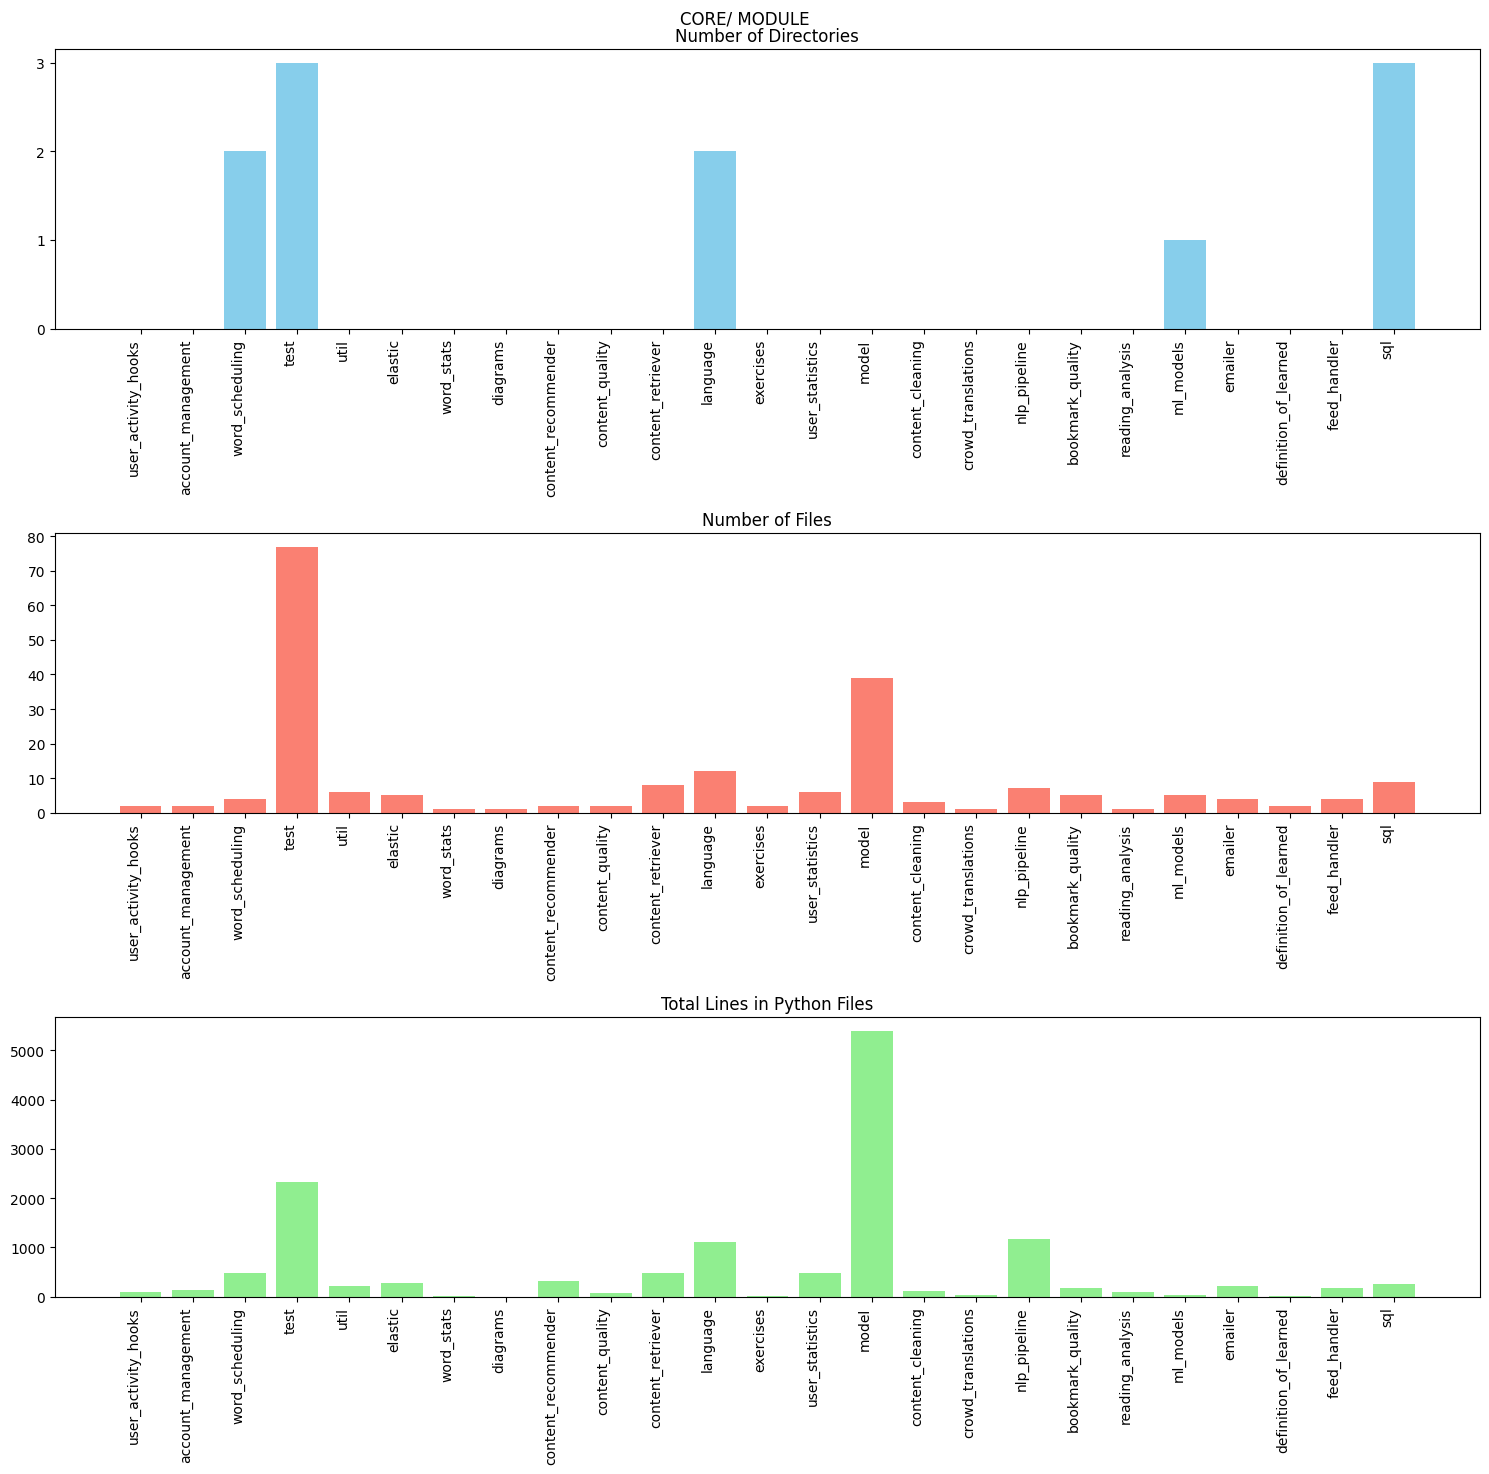

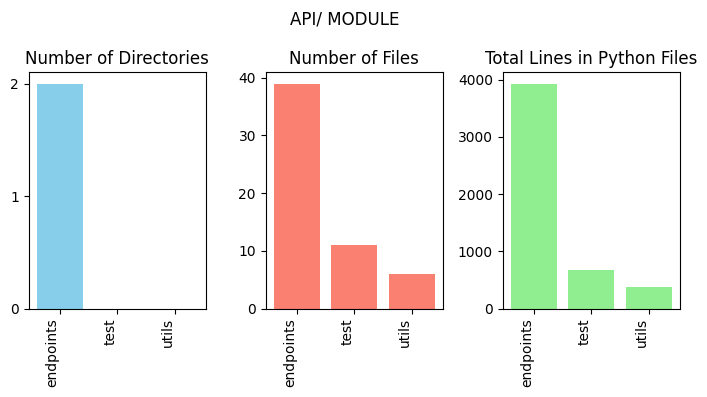

In [17]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def display(directory, subdir, rows=3, columns=1, figuresize=(15, 15)):
    dir_names, n_dirs_lst, n_files_lst, total_lines_lst = subdir

    fig, ax = plt.subplots(rows, columns, figsize=figuresize)

    ax[0].bar(dir_names, n_dirs_lst, color='skyblue')
    ax[0].set_title('Number of Directories')
    ax[0].set_xticks(range(len(dir_names)))
    ax[0].set_xticklabels(dir_names, rotation=90, ha='right')
    ax[0].yaxis.set_major_locator(MaxNLocator(integer=True))  # only integer values

    ax[1].bar(dir_names, n_files_lst, color='salmon')
    ax[1].set_title('Number of Files')
    ax[1].set_xticks(range(len(dir_names)))
    ax[1].set_xticklabels(dir_names, rotation=90, ha='right')

    ax[2].bar(dir_names, total_lines_lst, color='lightgreen')
    ax[2].set_title('Total Lines in Python Files')
    ax[2].set_xticks(range(len(dir_names)))
    ax[2].set_xticklabels(dir_names, rotation=90, ha='right')

    plt.suptitle(f"{directory.upper()} MODULE")
    plt.tight_layout()
    plt.show()

display(CORE, core_subdir)
display(API, api_subdir, 1, 3, (7, 4))

<div class="alert alert-block alert-success">
    For the CORE/ module, the model and test folders contain the most files and lines of code (LOC), whereas for the API/ module, the endpoints contain most of the files and LOC.
</div>

<div class="alert alert-block alert-info">
    We could spend more time to analysing the output from the Prospective tool, pinpointing which files have the most styling errors, bugs, etc., and identifying the most common error messages. However, this approach will not yield much insight into the project's architectural level.
</div>

### Bandit

The second static analysis tool I will use is Bandit, in order to find security issues in the code. Bandit processes the project, builds an abstract syntax tree (AST), runs plugins against the AST nodes, and generates a vulnerability report.

Link: [bandit.readthedocs.io](https://bandit.readthedocs.io/en/latest/)

In [18]:
!pip3 install bandit

In [19]:
current_folder = os.path.basename(os.getcwd())
print("Current folder:", current_folder)

Current folder: zeeguu


In [20]:
# Go to the root folder of the project
os.chdir('..')

In [21]:

BANDIT_REPORT = '../source_analysis_files/bandit_report.txt'

if not os.path.exists(BANDIT_REPORT):
    # Run bandit on entire project, and save the output to a file
    with open(BANDIT_REPORT, 'w') as f:
        subprocess.run(['bandit -r .'], stdout=f, shell=True)
    print("Report generated.")

print("Report already exists.")

Report already exists.


<div class="alert alert-block alert-success">
	Summary of generated report:
</div>

```txt
Code scanned:
	Total lines of code: 15473
	Total lines skipped (#nosec): 0
	Total potential issues skipped due to specifically being disabled (e.g., #nosec BXXX): 0

Run metrics:
	Total issues (by severity):
		Undefined: 0
		Low: 211
		Medium: 5
		High: 4
	Total issues (by confidence):
		Undefined: 0
		Low: 2
		Medium: 13
		High: 205
Files skipped (0):
```
<div class="alert alert-block alert-info">
	I will pinpoint two examples that both have high severity and confidence.
</div>

One is the following:

```txt
Issue: [B605:start_process_with_a_shell] Starting a process with a shell, possible injection detected, security issue.
Severity: High   Confidence: High
CWE: CWE-78 (https://cwe.mitre.org/data/definitions/78.html)
More Info: https://bandit.readthedocs.io/en/1.7.8/plugins/b605_start_process_with_a_shell.html
Location: ./tools/activity_monitor.py:43:4
42	    db_session.commit()
43	    os.system("cls" if os.name == "nt" else "clear")
44	    # print(chr(27) + "[2J")
```

<div class="alert alert-block alert-success">
	Here, Bandit detected a possible shell injection vulnerability; an OS command could, when sent as input from an upstream component, be modified. This means that attackers can execute commands directly on the OS. It is therefore proposed to use library calls instead of external processes, and this is something that could have been detected with a static analysis tool.
</div>

The next one is as follows:

```txt
Issue: [B324:hashlib] Use of weak MD5 hash for security. Consider usedforsecurity=False
Severity: High   Confidence: High
CWE: CWE-327 (https://cwe.mitre.org/data/definitions/327.html)
More Info: https://bandit.readthedocs.io/en/1.7.8/plugins/b324_hashlib.html
Location: ./zeeguu/api/endpoints/speech.py:127:8
126	
127	    m = hashlib.md5()
128	    m.update(full_article_text.encode("utf-8"))
```

<div class="alert alert-block alert-success">
	In this case, a weak hashing algorithm has been used, which could potentially compromise confidentiality (through unauthorized access) and integrity (through modification).
</div>

## In-Class Examples

Some in-class examples further illustrate the dependencies, which I have tested in the [reconstruction/source_analysis_files](reconstruction/source_analysis_files) file. To keep this notebook comprehensive, I will include these images here.